In [1]:
%cd /content/drive/MyDrive/multi/0525

/content/drive/MyDrive/multi/0525


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

- 데이터 전처리

In [4]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 13s 0us/step


In [5]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

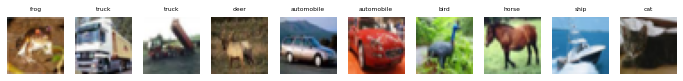

In [10]:
plt.figure(figsize=(12,6))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_train[i])
    plt.axis('off')
    plt.title(class_names[y_train[i,0]], fontsize=6)

plt.show()

In [11]:
X_train = X_train / 255.
X_test = X_test / 255.

In [12]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

- 모델 정의/학습/평가

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import RMSprop

In [14]:
model = Sequential([
    Conv2D(32, (3,3), input_shape=X_train.shape[1:], activation='relu'),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Conv2D(64, (3,3), padding='same',activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='relu')
])

In [17]:
model.compile(optimizer=RMSprop(learning_rate=0.001, decay=1e-6),
                                loss='categorical_crossentropy',
                                metrics=['accuracy'])

In [18]:
model_path = './best_cifar10-v1.h5'
mc = ModelCheckpoint(model_path, save_best_only=True, verbose=0)
es = EarlyStopping(patience = 10)

In [ ]:
hist = model.fit(
    X_train, y_train, validation_split=0.2,
    epochs=100, batch_size=32, callbacks=[mc,es]
)